# Spark code to Calculate Average of Friends a person have by Age

In [1]:
from pyspark import SparkConf, SparkContext
import collections
import time

import matplotlib.pyplot as plt

## Setup

In [2]:
conf = SparkConf().setMaster('local').setAppName('FriendsByAge')
sc = SparkContext(conf = conf)

## Processing files

In [5]:
def parseLine(line):
    fields = line.split(',')
    age = int(fields[2])
    numFriends = int(fields[3])
    return (age,numFriends)

In [117]:
lines = sc.textFile('data/fakefriends.csv')
rdd = lines.map(parseLine)

In [118]:
rdd.take(1)

[(33, 385)]

In [119]:
totalsByAge = rdd.mapValues(lambda x: (x, 1))

In [97]:
totalsByAge = totalsByAge.reduceByKey(lambda x,y: (x[0] + y[0], x[1] + y[1]))

In [98]:
totalsByAge.take(1)

[(33, (3904, 12))]

In [99]:
totalsByAge.sortByKey().take(10)

[(18, (2747, 8)),
 (19, (2346, 11)),
 (20, (825, 5)),
 (21, (2807, 8)),
 (22, (1445, 7)),
 (23, (2463, 10)),
 (24, (1169, 5)),
 (25, (2172, 11)),
 (26, (4115, 17)),
 (27, (1825, 8))]

In [55]:
averageByAge = totalsByAge.mapValues(lambda x: x[0]/x[1])

In [58]:
averageByAge.sortByKey().take(10)

[(18, 343.375),
 (19, 213.27272727272728),
 (20, 165.0),
 (21, 350.875),
 (22, 206.42857142857142),
 (23, 246.3),
 (24, 233.8),
 (25, 197.45454545454547),
 (26, 242.05882352941177),
 (27, 228.125)]

In [130]:
averageByAgeDict = averageByAge.collectAsMap()

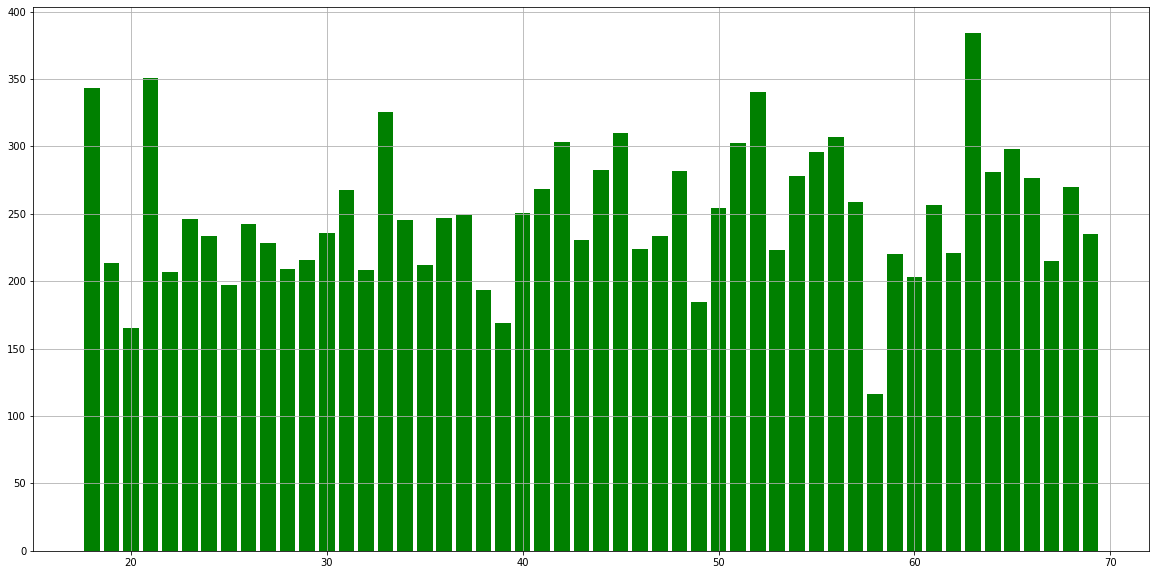

In [139]:
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(averageByAgeDict.keys(), averageByAgeDict.values(), color='g',)
plt.show()